In [12]:
from pathlib import Path
from src import constants
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsfresh
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
path_data = Path(constants.TIMESERIES_FEATURES_EXTRACTED)

In [13]:
# Read data
X = pd.read_pickle(path_data / 'X.pkl')

In [9]:
# Load the results
with open(str(path_data / 'sfs_backward.pkl'), 'rb') as handle:
    sfs_backward = pickle.load(handle)

with open(str(path_data / 'sfs_forward.pkl'), 'rb') as handle:
    sfs_forward = pickle.load(handle)

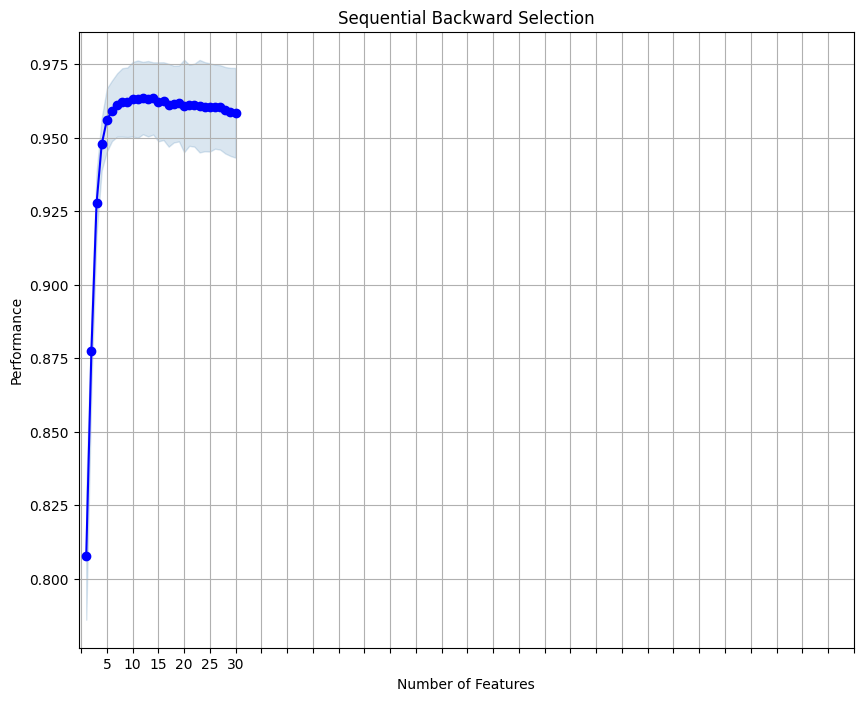

In [8]:
# Plot the results
plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev',figsize=(10, 8))
plt.title('Sequential Backward Selection')
plt.xticks(np.arange(0, 155, 5))
plt.grid()
#plt.savefig(str(report_path / 'feature_selection_backward.pdf'), bbox_inches='tight')
plt.show()

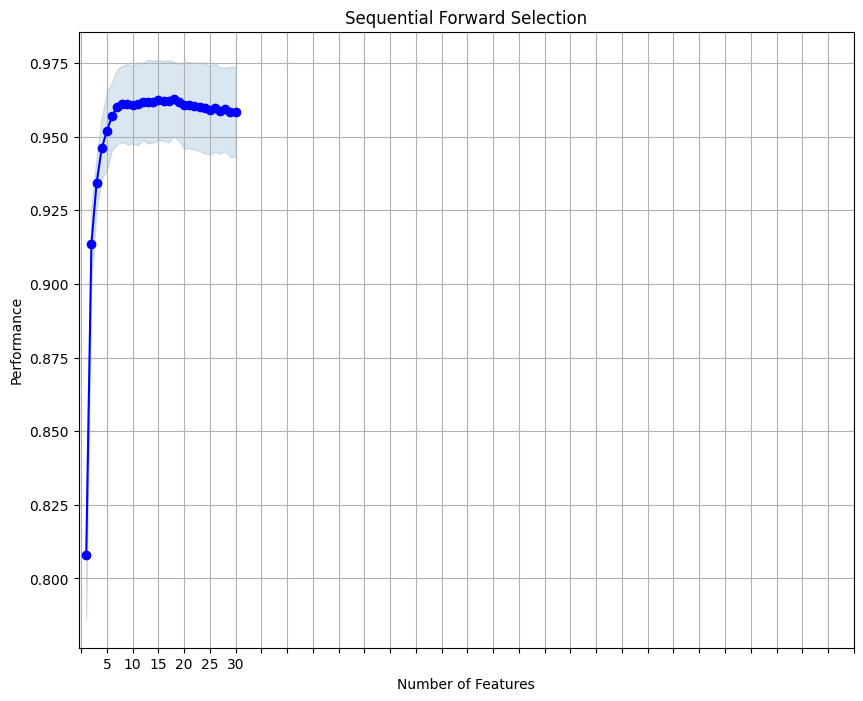

In [10]:
# Plot the results
plot_sfs(sfs_forward.get_metric_dict(), kind='std_dev',figsize=(10, 8))
plt.title('Sequential Forward Selection')
plt.xticks(np.arange(0, 155, 5))
plt.grid()
#plt.savefig(str(report_path / 'feature_selection_forward.pdf'), bbox_inches='tight')
plt.show()

In [11]:
final_features = list(
    set(sfs_backward.subsets_[7]['feature_names']) |
    set(sfs_forward.subsets_[7]['feature_names'])
    )

print(f'Number of final features: {len(final_features)}')
print(final_features)

Number of final features: 11
['2__fft_coefficient__attr_"angle"__coeff_5', '2__mean_change', '2__quantile__q_0.1', '2__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"', '49__cid_ce__normalize_False', '2__linear_trend__attr_"slope"', '49__lempel_ziv_complexity__bins_5', '2__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)', '2__number_crossing_m__m_0', '37__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2', '2__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)']


In [15]:
with open(str(path_data / 'final_features.pkl'), "wb") as f:
    pickle.dump(final_features, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save the extraction settings

# Construct the timeseries extraction settings
kind_to_fc_parameters = tsfresh.feature_extraction.settings.from_columns(
    X[final_features]
)

# Turn all keys to integers in kind_to_fc_parameters
kind_to_fc_parameters = {int(k): v for k, v in kind_to_fc_parameters.items()}

# Save the settings object
with open(str(path_data / 'kind_to_fc_parameters.pkl'), "wb") as f:
    pickle.dump(kind_to_fc_parameters, f, protocol=pickle.HIGHEST_PROTOCOL)